## Extracting the News From URL

In [2]:
import numpy as np
import pandas as pd

In [3]:
import requests
# 
url = f"https://newsapi.org/v2/everything?q=Tesla&apiKey=a7d16eaa9d7489fae472b23492c9a6b&pageSize=20"
response = requests.get(url)


In [4]:
def data_():
    if response.status_code == 200:
         return response.json()
    else:
        print(f"Error fetching data: {response.status_code}")
        return None

In [ ]:
data=data_()
data #facing error to load the news

Error fetching data: 401


In [7]:
import requests

# Define a function to get data from an API
def data_(company_name,api_key,num_articles=10):
    url = f"https://newsapi.org/v2/everything?q={company_name}&apiKey={api_key}&pageSize={num_articles}" # Example API URL
    response = requests.get(url)  
    
 # Check if response is successful
    if response.status_code == 200: 
        return response.json()
    else:
        print(f"Error fetching data: {response.status_code}")
        return None

In [8]:
# Call the function and assign data to variable
company_name = "Tesla"
api_key = "3a7d16eaa9d7489fae472b23492c9a6b" 
data = data_(company_name,api_key)

In [9]:
# Print the fetched data
data

{'status': 'ok',
 'totalResults': 15701,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Andrew J. Hawkins',
   'title': 'Is Tesla cooked?',
   'description': 'Tesla stock plunged 15 percent on Monday, its steepest drop in five years. The price is down over 50 percent since its December highs. Tesla owners, disgusted with Elon Muskâ\x80\x99s slash-and-burn tactics for the Trump administration, are selling their vehicles a…',
   'url': 'https://www.theverge.com/tesla/627894/tesla-stock-sales-protest-musk-trump-doge',
   'urlToImage': 'https://platform.theverge.com/wp-content/uploads/sites/2/2025/03/STK022_ELON_MUSK_4_CVIRGINIA_B.webp?quality=90&strip=all&crop=0%2C10.732984293194%2C100%2C78.534031413613&w=1200',
   'publishedAt': '2025-03-11T22:17:04Z',
   'content': 'The CEO is absent, the stocks are plummeting, and the brand is toxic. Teslas future looks grim. \r\nThe CEO is absent, the stocks are plummeting, and the brand is toxic. Teslas future looks 

In [10]:
import requests
import json

# Define function to fetch news articles using NewsAPI
def fetch_news(company_name, api_key, num_articles=10):
    url = f"https://newsapi.org/v2/everything?q={company_name}&apiKey={api_key}&pageSize={num_articles}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        articles = []
        for article in data["articles"]:
            articles.append({
                "Title": article["title"],
                "Summary": article["description"],
            })
        return articles
    else:
        print(f"Error fetching news: {response.status_code}")
        return []

# Input company name and API key
company_name = "Google"
api_key = "3a7d16eaa9d7489fae472b23492c9a6b"  # Replace with your NewsAPI key
news_articles = fetch_news(company_name, api_key)

# Print extracted articles in JSON format
output = {
    "Company": company_name,
    "Articles": news_articles
}

print(json.dumps(output, indent=4, ensure_ascii=False))


{
    "Company": "Google",
    "Articles": [
        {
            "Title": "How to find images in Google Photos",
            "Summary": "Google Photos makes backing up photos and videos from your phone pretty seamless: set it to work in the background and all your precious memories are saved to the cloud without you having to do anything else.Â Â  The smoothness of this process does tend to me…"
        },
        {
            "Title": "Google Drive gets searchable video transcripts",
            "Summary": "Google has announced new searchable transcripts for videos you store in Google Drive. The feature is rolling out to all Google Workspace users, starting today and finishing by March 26th. The transcripts look a lot like those you’d see on YouTube. If one is a…"
        },
        {
            "Title": "Chegg sues Google over AI Overviews",
            "Summary": "Online education company Chegg filed a lawsuit on February 24th against Google claiming that the company’s AI-genera

## Sentiment Analysis

In [11]:
from textblob import TextBlob

In [12]:
data['articles'][1]['description']

'Today we’re talking about the protests against Tesla, which have been branded on social media under the hashtag Tesla Takedown. The protests are, of course, a reaction to Elon Musk, who has managed to install himself as basically a not-so-shadow president who…'

In [13]:
text=data['articles'][1]['description']
analysis = TextBlob(text)
polarity = analysis.sentiment.polarity
polarity

0.03333333333333333

In [14]:

analysis = TextBlob(text)
polarity = analysis.sentiment.polarity

if polarity > 0:
    print("Positive")
elif polarity < 0:
    print("Negative")
else:
    print("Neutral")

Positive


In [15]:
# Function to perform sentiment analysis
def get_sentiment(text):
    if text:
        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity

        if polarity > 0:
            return "Positive"
        elif polarity < 0:
            return "Negative"
        else:
            return "Neutral"
    else:
        return "Neutral"


In [16]:
for article in data['articles']:
    print(article['description'])
    print('-------------------')

Tesla stock plunged 15 percent on Monday, its steepest drop in five years. The price is down over 50 percent since its December highs. Tesla owners, disgusted with Elon Muskâs slash-and-burn tactics for the Trump administration, are selling their vehicles a…
-------------------
Today we’re talking about the protests against Tesla, which have been branded on social media under the hashtag Tesla Takedown. The protests are, of course, a reaction to Elon Musk, who has managed to install himself as basically a not-so-shadow president who…
-------------------
As reports of vandalism and even a supposed doxing website targeting Tesla locations and vehicles continue to appear, Attorney General Pam Bondi issued a new warning about old crimes. In a Department of Justice press release, she “announced charges against th…
-------------------
The taxi service will initially operate with Tesla employee drivers only, use current-model vehicles, and won't allow for driverless rides.
-----------------

In [17]:
for article in data['articles']:
    print(get_sentiment(article['description']))

Negative
Positive
Positive
Neutral
Positive
Positive
Neutral
Positive
Negative
Neutral


In [18]:
new_data=pd.DataFrame(data['articles'])[['title','description']]
new_data.rename(columns={'title':'Title','description':'Summary'},inplace=True)
new_data


,Title,Summary
0,Is Tesla cooked?,"Tesla stock plunged 15 percent on Monday, its ..."
1,How the Tesla brand turned so toxic,Today we’re talking about the protests against...
2,US attorney general re-announces ‘severe’ char...,As reports of vandalism and even a supposed do...
3,Tesla Got a Permit to Operate a Taxi Service i...,The taxi service will initially operate with T...
4,Ford’s Tesla Supercharger adapters are now on ...,Ford is making some changes to how it handles ...
5,Tesla Superchargers coming to dozens of Steak ...,Tesla is planning to install dozens of Superch...
6,Ford Is Sticking With an EV Future,CEO Jim Farley tells us that every qualified o...
7,"Donald Trump Bought a $90,000 Tesla With 37 Re...",Here's hoping Elon Musk won't have to personal...
8,Tesla Cybertruck deliveries reportedly on hold...,America’s favorite low poly electric truck is ...
9,Elon Musk made more promises about Optimus and...,At a surprise all-hands-on meeting Thursday ni...


In [19]:
for i in new_data['Summary']:
    print(get_sentiment(i))

Negative
Positive
Positive
Neutral
Positive
Positive
Neutral
Positive
Negative
Neutral


In [20]:
Sentiment=[]
for i in new_data['Summary']:
    Sentiment.append(get_sentiment(i))
print(Sentiment)

['Negative', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Negative', 'Neutral']


In [21]:
new_data['Sentiment']=Sentiment
new_data

,Title,Summary,Sentiment
0,Is Tesla cooked?,"Tesla stock plunged 15 percent on Monday, its ...",Negative
1,How the Tesla brand turned so toxic,Today we’re talking about the protests against...,Positive
2,US attorney general re-announces ‘severe’ char...,As reports of vandalism and even a supposed do...,Positive
3,Tesla Got a Permit to Operate a Taxi Service i...,The taxi service will initially operate with T...,Neutral
4,Ford’s Tesla Supercharger adapters are now on ...,Ford is making some changes to how it handles ...,Positive
5,Tesla Superchargers coming to dozens of Steak ...,Tesla is planning to install dozens of Superch...,Positive
6,Ford Is Sticking With an EV Future,CEO Jim Farley tells us that every qualified o...,Neutral
7,"Donald Trump Bought a $90,000 Tesla With 37 Re...",Here's hoping Elon Musk won't have to personal...,Positive
8,Tesla Cybertruck deliveries reportedly on hold...,America’s favorite low poly electric truck is ...,Negative
9,Elon Musk made more promises about Optimus and...,At a surprise all-hands-on meeting Thursday ni...,Neutral


## Comparative Analysis

In [22]:
# Group and count sentiment
sentiment_count = new_data["Sentiment"].value_counts().reset_index()
sentiment_count.columns = ["Sentiment", "Count"]

# Display sentiment distribution
print(sentiment_count)

  Sentiment  Count
0  Positive      5
1   Neutral      3
2  Negative      2


## Visualize Sentiment Distribution

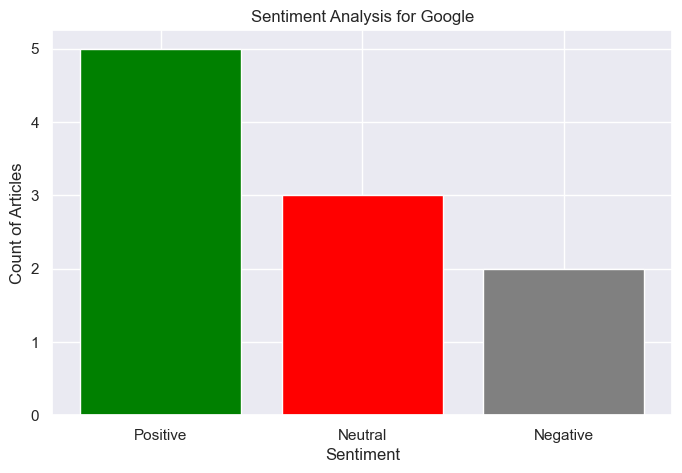

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
plt.bar(sentiment_count["Sentiment"], sentiment_count["Count"], color=["green", "red", "gray"])
plt.title(f"Sentiment Analysis for {company_name}")
plt.xlabel("Sentiment")
plt.ylabel("Count of Articles")
plt.show()

### Voice Generation

In [23]:
from gtts import gTTS
import os

In [31]:
def text_to_speech(text, language='en', output_file='news_summary.mp3'):
    if text.strip() == "":
        print("No text provided for TTS conversion.")
        return

    try:
        # Initialize gTTS object
        tts = gTTS(text=text, lang=language, slow=False)
        
        # Save the converted audio as MP3
        tts.save(output_file)
        print(f"Audio saved as {output_file}")
        
        # Play the audio file (optional)
        os.system(f"start {output_file}" if os.name == "nt" else f"afplay {output_file}")

    except Exception as e:
        print(f"Error during TTS conversion: {e}")


In [32]:
summarized_content = 'hi how are you'

# Convert summarized content to Hindi speech
text_to_speech(summarized_content)

Audio saved as news_summary.mp3
